## Nataf - Example 1

Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt

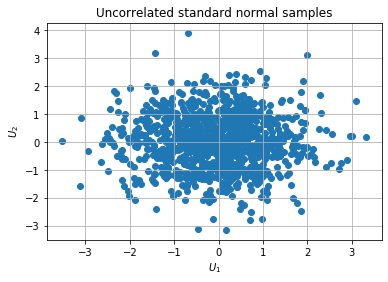

In [5]:
# Example 1a: 
#In this example, the  inverse method of the Nataf class is used in order to transform 
#1000 samples of 2 uncorrelated standard normal variables to a lognormal and a gamma distribution.

x1 = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the initial samples
plt.figure()
plt.title('Uncorrelated standard normal samples')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.


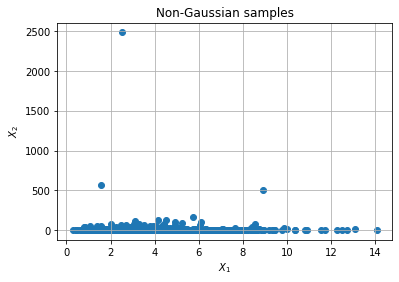

In [6]:
x_ng2 = Nataf(corr = np.eye(2), dimension=2, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
x_ng2.inverse(x1.samples)

plt.figure()
plt.title('Non-Gaussian samples')
plt.scatter(x_ng2.x[:, 0], x_ng2.x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 9.680171417616117e-20]
UQpy: ITAM Done.


/Users/dimitrisgiovanis/PycharmProjects/UQpy/src/UQpy/Utilities.py:275: RuntimeWarning: divide by zero encountered in true_divide
  max_ratio = np.amax(np.ones((len(corr), len(corr))) / abs(corr_norm0))


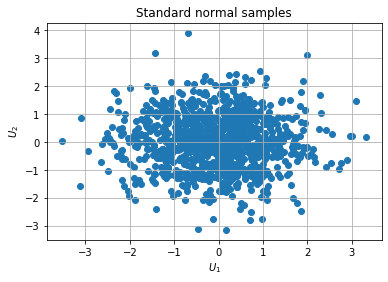

In [9]:
# Example 1b: 
#In this example, the  transform method of the Nataf class is used in order to transform 
# the 2 uncorrelated non-Gaussian variables back to the standard normal space.

x_ng2.transform(x_ng2.x)

plt.figure()
plt.title('Standard normal samples')
plt.scatter(x_ng2.u[:, 0], x_ng2.u[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()